In [1]:
import seaborn as sns
import plotly.express as px
import missingno as msn
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
warnings.filterwarnings("ignore")
df = pd.read_csv("/Users/hajiaga/Downloads/globalterrorismdb_0718dist.csv" ,  encoding="ISO-8859-1")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hajiaga/Downloads/globalterrorismdb_0718dist.csv'

In [ ]:
df.rename(columns={'eventid': 'ID' , 'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)
dff = df[['ID','Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

<Axes: xlabel='Number of terrorist attacks', ylabel='Country'>

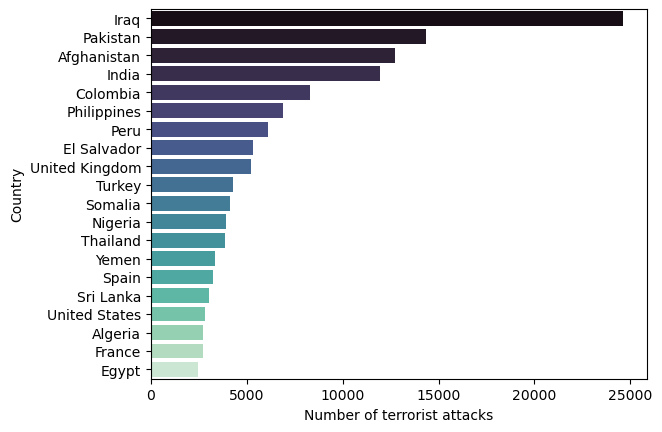

In [ ]:
numbof = df.groupby("Country" )["latitude" , "longitude"].size().reset_index()
numbof.columns = ["Country" , "Number of terrorist attacks"]
#numbof = numbof.nlargest(20 , "Number of terrorist attacks" )
plt.plot("Country"  , color = "black")
sns.set_palette("dark")
sns.barplot(y="Country" , x = "Number of terrorist attacks" , data = numbof.nlargest(20 , "Number of terrorist attacks" ),palette="mako")


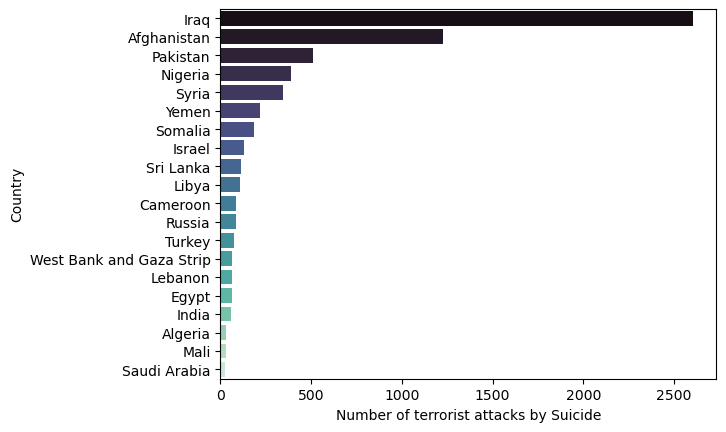

In [ ]:
suicon = df[df["suicide"] == 1 ].groupby("Country").size().reset_index()
suicon.columns = ["Country" , "Number of terrorist attacks by Suicide"]
suicon = suicon.nlargest(20 , "Number of terrorist attacks by Suicide" )
plt.plot("Country"  , color = "black")
sns.set_palette("dark")
sns.barplot(y="Country" , x = "Number of terrorist attacks by Suicide" , data = suicon,palette="mako")
warnings.filterwarnings("ignore")


In [ ]:
fig = px.choropleth(numbof, locations="Country" ,locationmode='country names', color= "Number of terrorist attacks", projection="natural earth" , title="Attack counts on world map" , hover_name="Country" , color_continuous_scale="Reds")
fig.show()

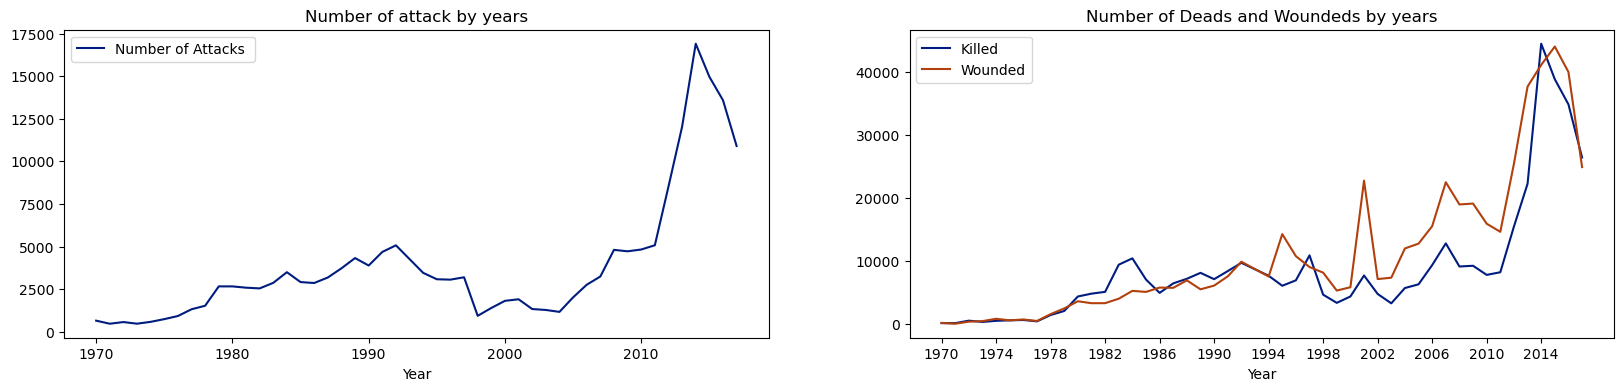

In [ ]:
fig , rows = plt.subplots(nrows = 1 , ncols = 2 ,figsize = [20,4])

yearly = dff.groupby("Year").size().reset_index()
yearly.columns = ["Year" , "Number of Attacks "]
yearly.plot(kind="line" , ax = rows[0] , x="Year" , title="Number of attack by years")
plt.xticks(np.arange(dff["Year"].min() , dff["Year"].max(), step=4))

ikinci = dff.groupby("Year")["Killed" , "Wounded"].sum().reset_index()
ikinci.plot(kind = "line" , ax = rows[1] , x = "Year" , title = "Number of Deads and Woundeds by years")
plt.xticks(np.arange(dff["Year"].min() , dff["Year"].max(), step=4))
warnings.filterwarnings("ignore")


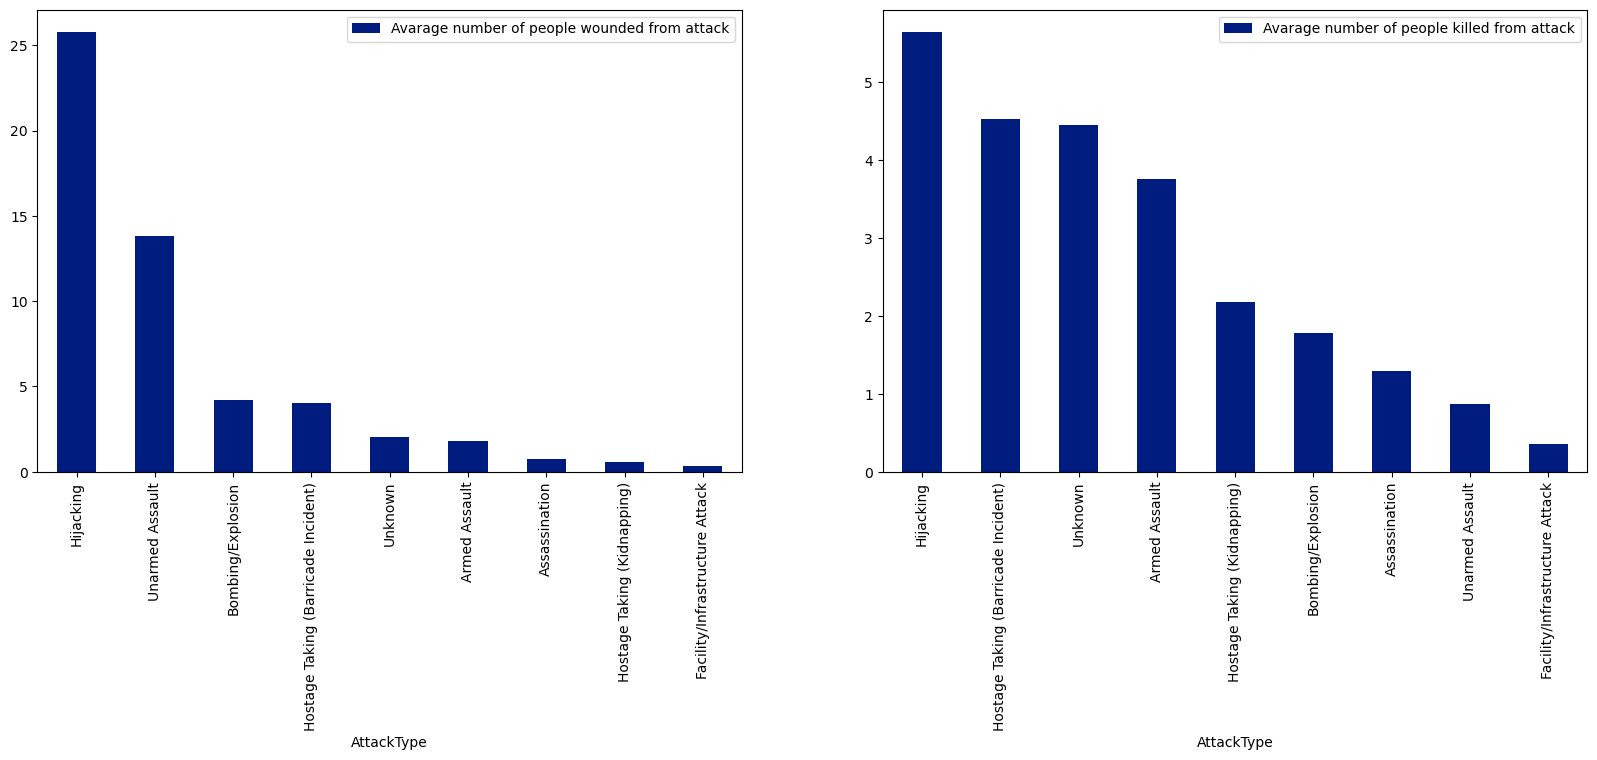

In [ ]:
ataktip = dff.groupby("AttackType")["Killed" , "Wounded"].sum().reset_index()
iki = dff.groupby("AttackType").size().reset_index()
iki.columns = ["1" , "2"]
ataktip["Avarage number of people killed from attack"] = ataktip["Killed"]/iki['2']
ataktip["Avarage number of people wounded from attack"] = ataktip["Wounded"]/iki['2']
ataktip.drop(['Killed' , "Wounded"],
  axis='columns', inplace=True)
ataktip.sort_values(by= "Avarage number of people wounded from attack" , inplace=True , ascending=False)
fig , rows = plt.subplots(ncols=2 , nrows=1 , figsize = [20,6])
ataktip.plot(kind ="bar"  ,y="Avarage number of people wounded from attack", x = "AttackType" , ax = rows[0])
ataktip.sort_values(by= "Avarage number of people killed from attack" , inplace=True , ascending=False)

ataktip.plot(kind ="bar"  ,y="Avarage number of people killed from attack", x = "AttackType" , ax = rows[1])

plt.show()

[]

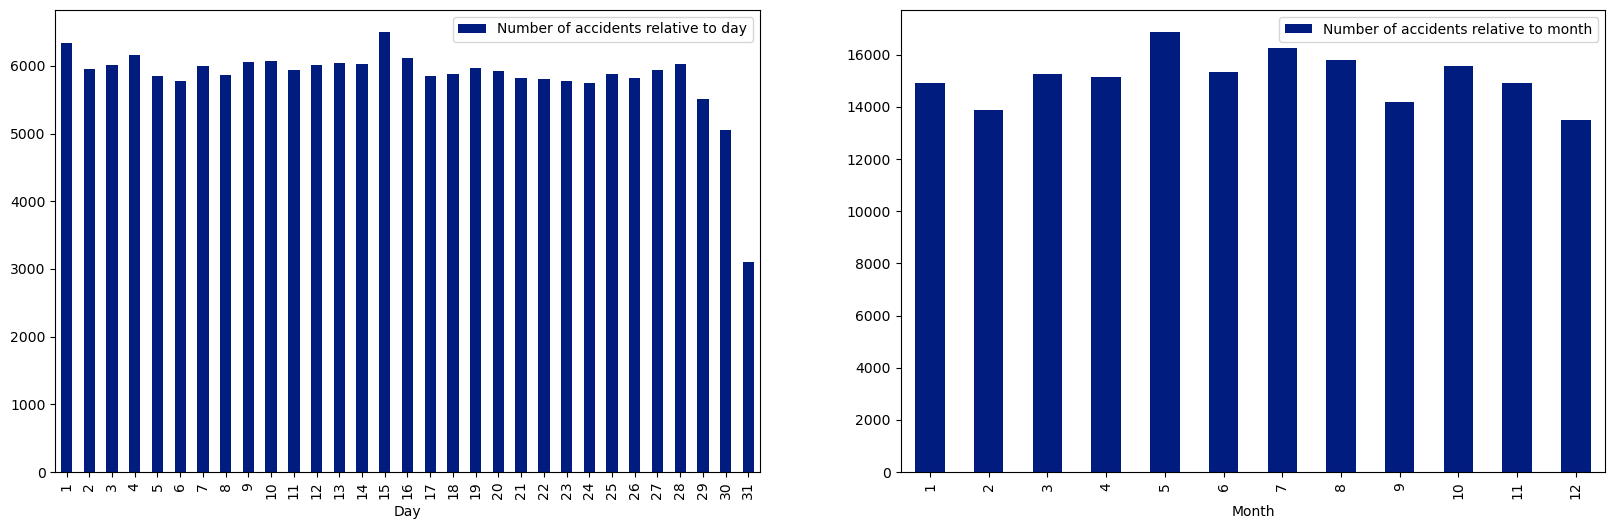

In [ ]:
ayagore = dff.groupby("Month").size().reset_index(statistics_dick_size)
gunegore = dff.groupby("Day").size().reset_index()
gunegore.columns = ["Day" , "Number of accidents relative to day"]
ayagore.columns = ["Month" , "Number of accidents relative to month"]
gunegore = gunegore[gunegore["Day"]>0]
ayagore = ayagore[ayagore["Month"]>0]

fig , rows = plt.subplots(ncols=2 , nrows=1 , figsize = [20,6])
gunegore.plot(kind ="bar"  , x = "Day" , ax = rows[0])
ayagore.plot(kind ="bar"  , x = "Month" , ax = rows[1])
plt.plot()



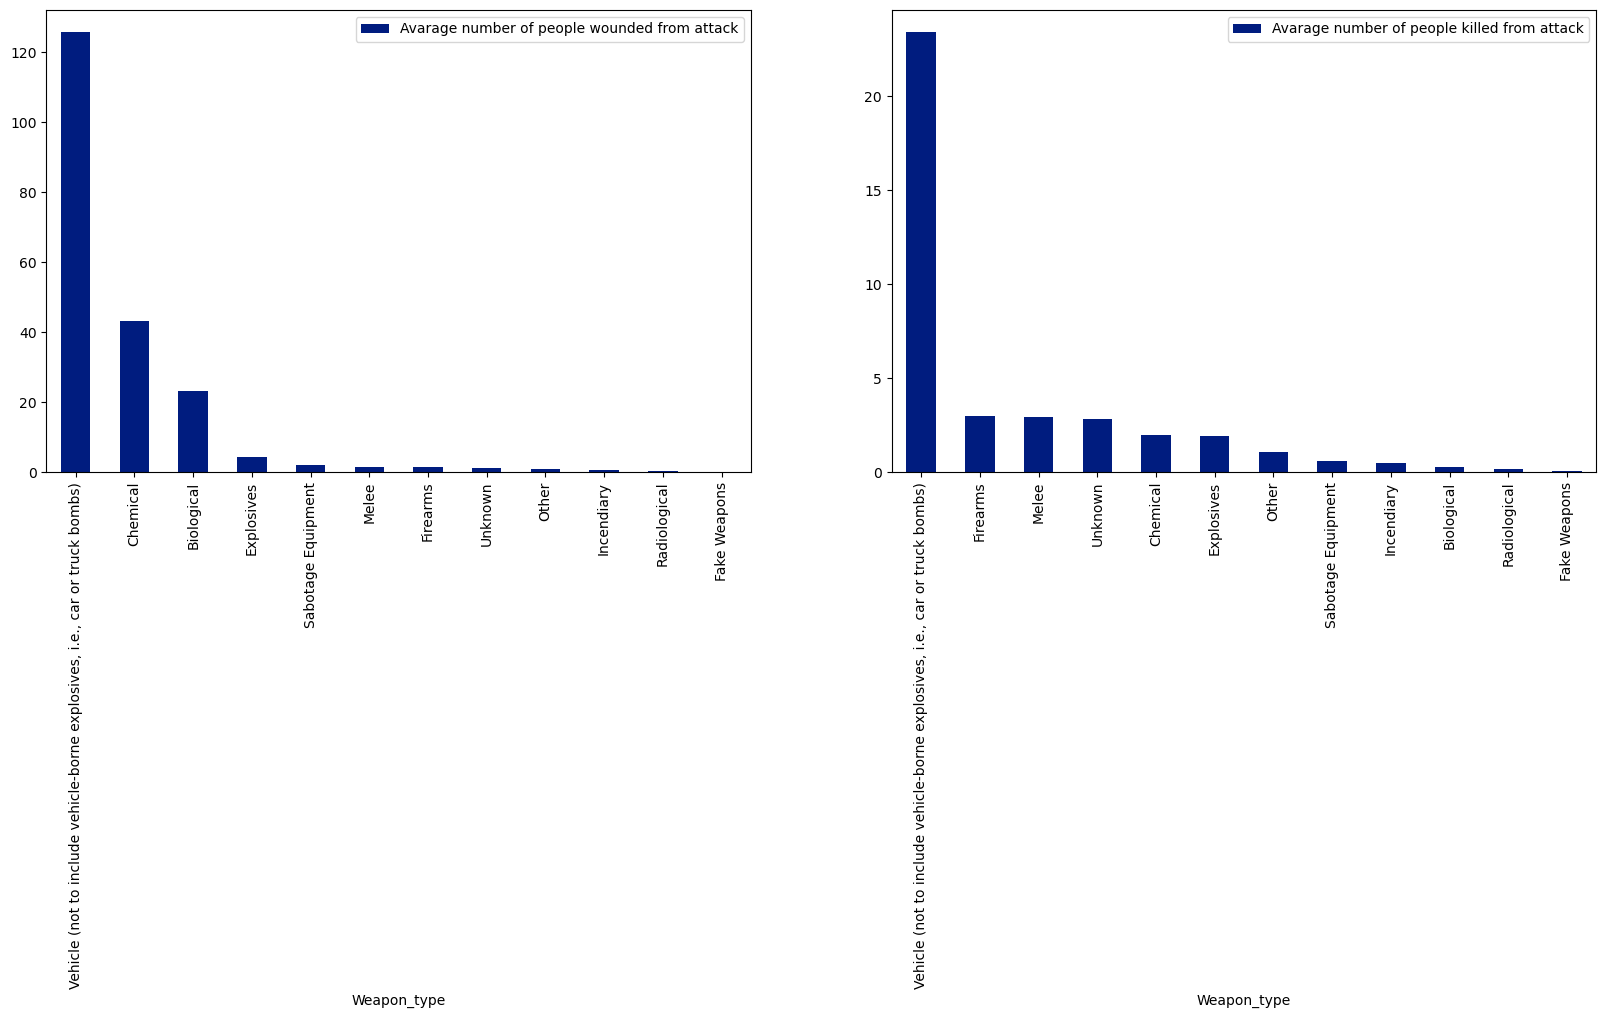

In [ ]:
ataktip = dff.groupby("Weapon_type")["Killed" , "Wounded"].sum().reset_index()
iki = dff.groupby("Weapon_type").size().reset_index()
iki.columns = ["1" , "2"]
ataktip["Avarage number of people killed from attack"] = ataktip["Killed"]/iki['2']
ataktip["Avarage number of people wounded from attack"] = ataktip["Wounded"]/iki['2']
ataktip.drop(['Killed' , "Wounded"],
  axis='columns', inplace=True)
ataktip.sort_values(by= "Avarage number of people wounded from attack" , inplace=True , ascending=False)
fig , rows = plt.subplots(ncols=2 , nrows=1 , figsize = [20,6])
ataktip.plot(kind ="bar"  ,y="Avarage number of people wounded from attack", x = "Weapon_type" , ax = rows[0])
ataktip.sort_values(by= "Avarage number of people killed from attack" , inplace=True , ascending=False)

ataktip.plot(kind ="bar"  ,y="Avarage number of people killed from attack", x = "Weapon_type" , ax = rows[1])

plt.show()

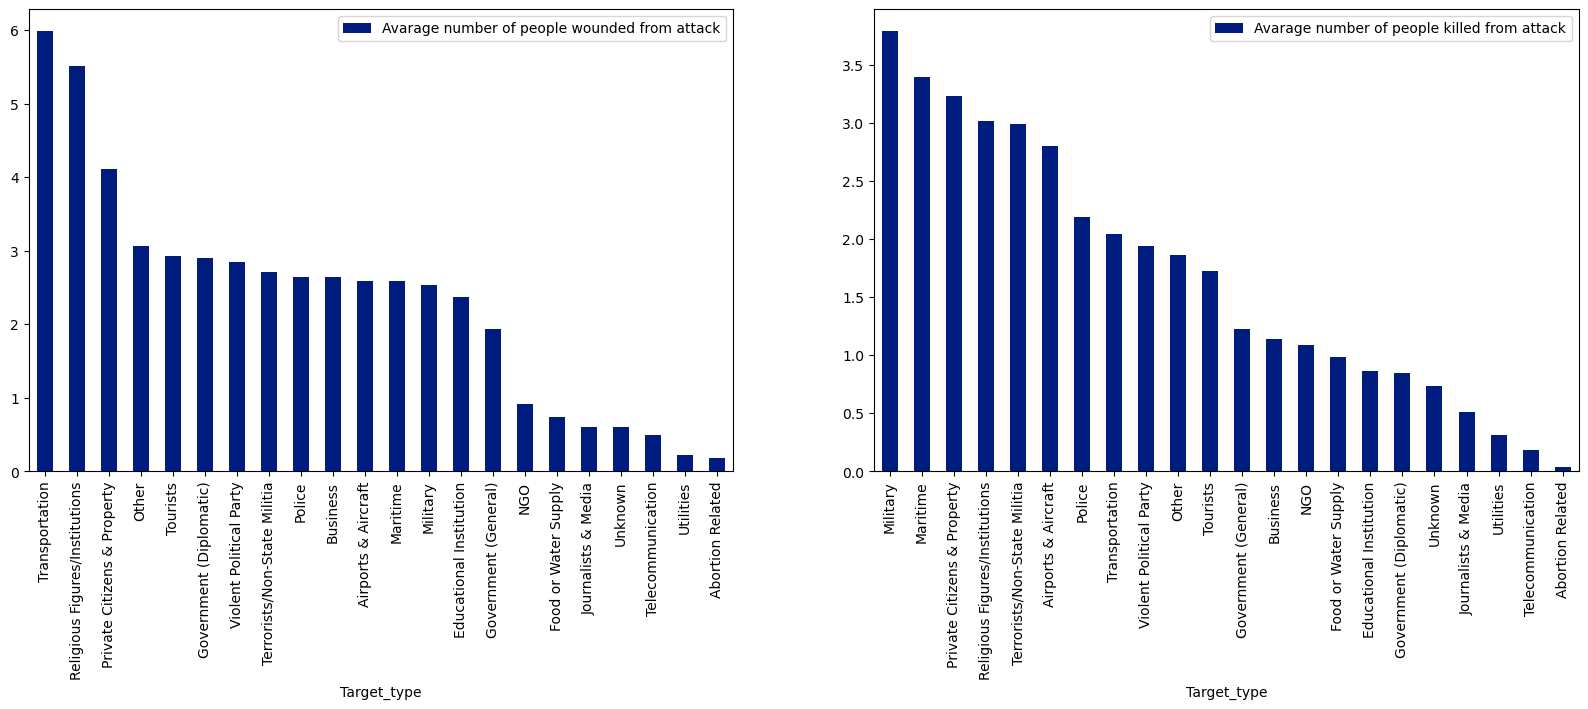

In [ ]:
ataktip = dff.groupby("Target_type")["Killed" , "Wounded"].sum().reset_index()
iki = dff.groupby("Target_type").size().reset_index()
iki.columns = ["1" , "2"]
ataktip["Avarage number of people killed from attack"] = ataktip["Killed"]/iki['2']
ataktip["Avarage number of people wounded from attack"] = ataktip["Wounded"]/iki['2']
ataktip.drop(['Killed' , "Wounded"],
  axis='columns', inplace=True)
ataktip.sort_values(by= "Avarage number of people wounded from attack" , inplace=True , ascending=False)
fig , rows = plt.subplots(ncols=2 , nrows=1 , figsize = [20,6])
ataktip.plot(kind ="bar"  ,y="Avarage number of people wounded from attack", x = "Target_type" , ax = rows[0])
ataktip.sort_values(by= "Avarage number of people killed from attack" , inplace=True , ascending=False)

ataktip.plot(kind ="bar"  ,y="Avarage number of people killed from attack", x = "Target_type" , ax = rows[1])

plt.show()
